In [1]:
library(repr)
library(tidyverse)
library(dplyr)
library(tidyverse)
library(tidymodels)
library(cowplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [9]:
players <-read_csv("data/players.csv") |>
select(experience, subscribe, played_hours, age)
players

Rows: 196 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, age
lgl (3): subscribe, individualId, organizationName

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,played_hours,age
<chr>,<lgl>,<dbl>,<dbl>
Pro,TRUE,30.3,9
Veteran,TRUE,3.8,17
Veteran,FALSE,0.0,17
Amateur,TRUE,0.7,21
Regular,TRUE,0.1,21
Amateur,TRUE,0.0,17
Regular,TRUE,0.0,19
Amateur,FALSE,0.0,21
Amateur,TRUE,0.1,17


In [30]:
#data wrangling
players_renamed <- players |>
mutate(experience = recode(experience, "Beginner" = 1, "Amateur"=2, "Regular"=3, "Pro"=4, "Veteran"=5)) |>
mutate(subscribe = recode(as.character(subscribe), "FALSE"=0, "TRUE"=1)) |>
subset(played_hours < 50)
players_renamed

experience,subscribe,played_hours,age
<dbl>,<dbl>,<dbl>,<dbl>
4,1,30.3,9
5,1,3.8,17
5,0,0.0,17
2,1,0.7,21
3,1,0.1,21
2,1,0.0,17
3,1,0.0,19
2,0,0.0,21
2,1,0.1,17


In [31]:
set.seed(999)
players_split2 <- initial_split(players_renamed, prop=0.7, strata = played_hours)
players_training2 <-training(players_split2)
players_testing2 <-testing(players_split2)

In [32]:
set.seed(999)
players_spec<- nearest_neighbor(weight_func="rectangular", neighbor=tune()) |>
set_engine ("kknn") |>
set_mode("regression")

players_recipe2 <-recipe(played_hours ~experience + subscribe + age, data = players_training2) |>
step_scale(all_predictors())|>
step_center(all_predictors())
players_recipe2



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 3



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [33]:
set.seed(999)
#the neighbors2 generate a long warning message that I am not sure whether it affects final outcome.
# small folds for small data
vfold <- vfold_cv(players_training2, v=5)
grid1 <-tibble(neighbors=seq(from=1, to=10, by=1))

find_k<-workflow() |>
            add_recipe(players_recipe2) |>
            add_model(players_spec) |>
            tune_grid(resamples=vfold,grid=grid1)
findk_results<-collect_metrics(find_k)
findk_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,7.487648262,5,1.0234819040,Preprocessor1_Model01
1,rsq,standard,0.021156958,5,0.0208572130,Preprocessor1_Model01
2,rmse,standard,6.299700081,5,1.4564964960,Preprocessor1_Model02
2,rsq,standard,0.009226068,5,0.0070521688,Preprocessor1_Model02
3,rmse,standard,6.136286124,5,1.4284018894,Preprocessor1_Model03
3,rsq,standard,0.004803635,5,0.0008293341,Preprocessor1_Model03
4,rmse,standard,6.205607710,5,1.4116407274,Preprocessor1_Model04
4,rsq,standard,0.005665127,5,0.0012466060,Preprocessor1_Model04
5,rmse,standard,5.993831777,5,1.4977235244,Preprocessor1_Model05


In [34]:
set.seed(999)
best_k3<-filter(findk_results, .metric =="rmse") |>
slice_min(mean, n=1)
best_k3


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
7,rmse,standard,5.677992,5,1.569536,Preprocessor1_Model07


In [35]:
set.seed(999)
k3 <-pull(best_k3, neighbors)

best_k_spec<-nearest_neighbor(weight_func="rectangular", neighbor=k3) |>
set_engine ("kknn") |>
set_mode("regression")

players_fit1<-workflow() |>
            add_recipe(players_recipe2) |>
            add_model(best_k_spec) |>
            fit(players_training2)

players_rmpse <- players_fit1|>
           predict(players_testing2) |>
           bind_cols(players_testing2) |>
           metrics(truth = played_hours, estimate = .pred) |>
filter(.metric=="rmse")
players_rmpse

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3.309358


In [38]:
set.seed(999)
test_pred <- players_fit1|>
           predict(players_testing2) |>
           bind_cols(players_testing2) 
test_pred

.pred,experience,subscribe,played_hours,age
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.88571429,2,1,0.7,21
0.31428571,2,0,0.0,21
0.12857143,4,1,0.0,17
5.14285714,2,1,0.2,22
0.18571429,1,1,0.0,17
0.02857143,2,1,0.5,17
0.22857143,3,1,0.6,19
0.84285714,5,0,1.4,25
0.02857143,2,1,0.2,17


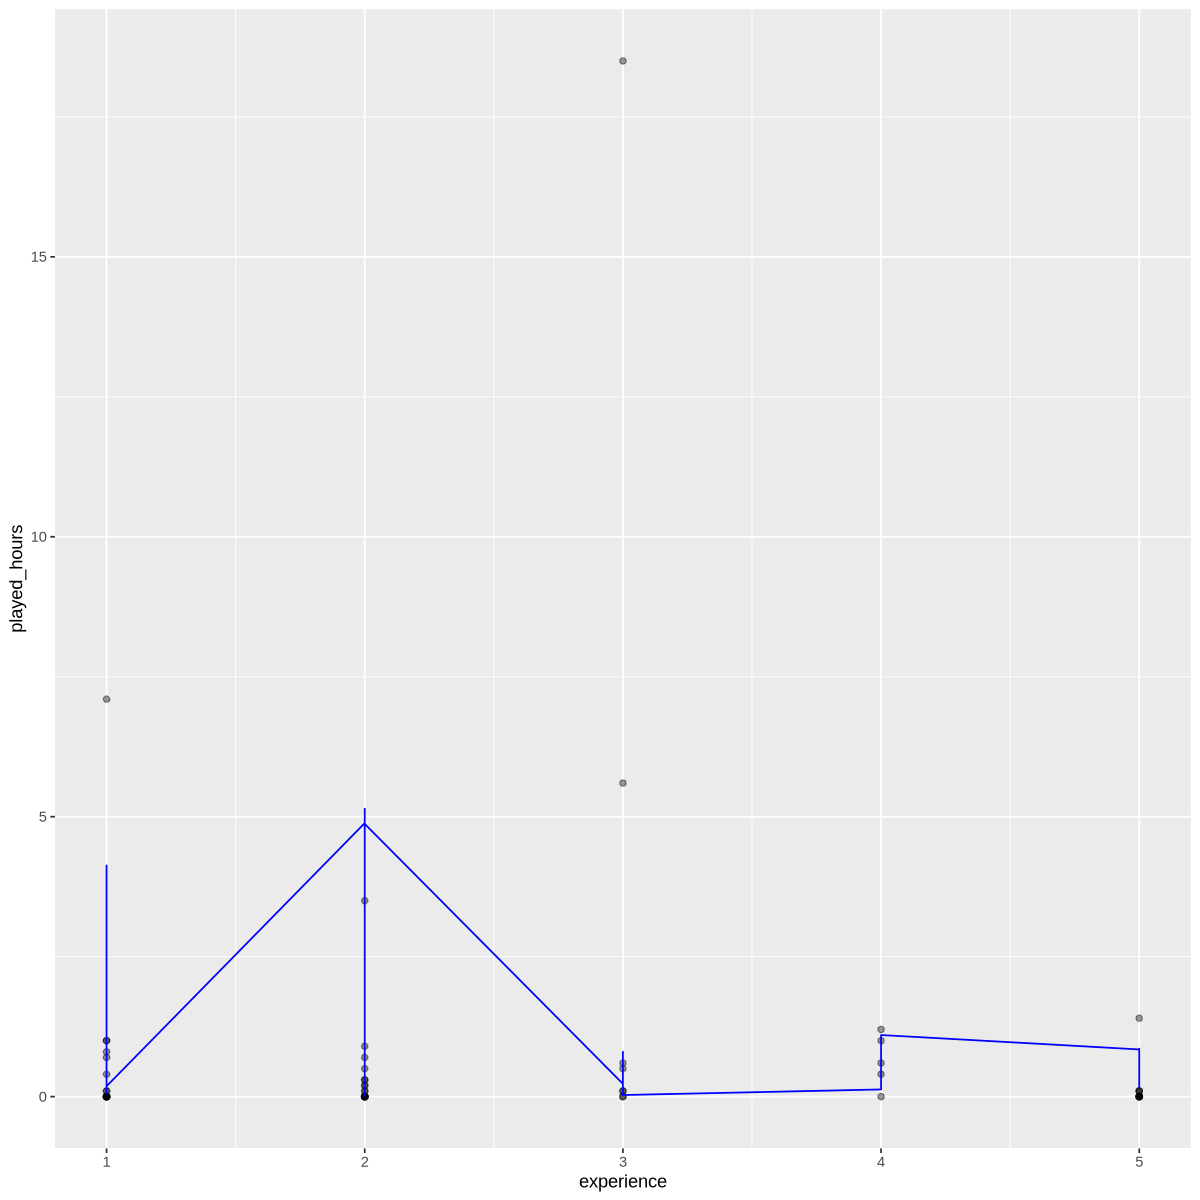

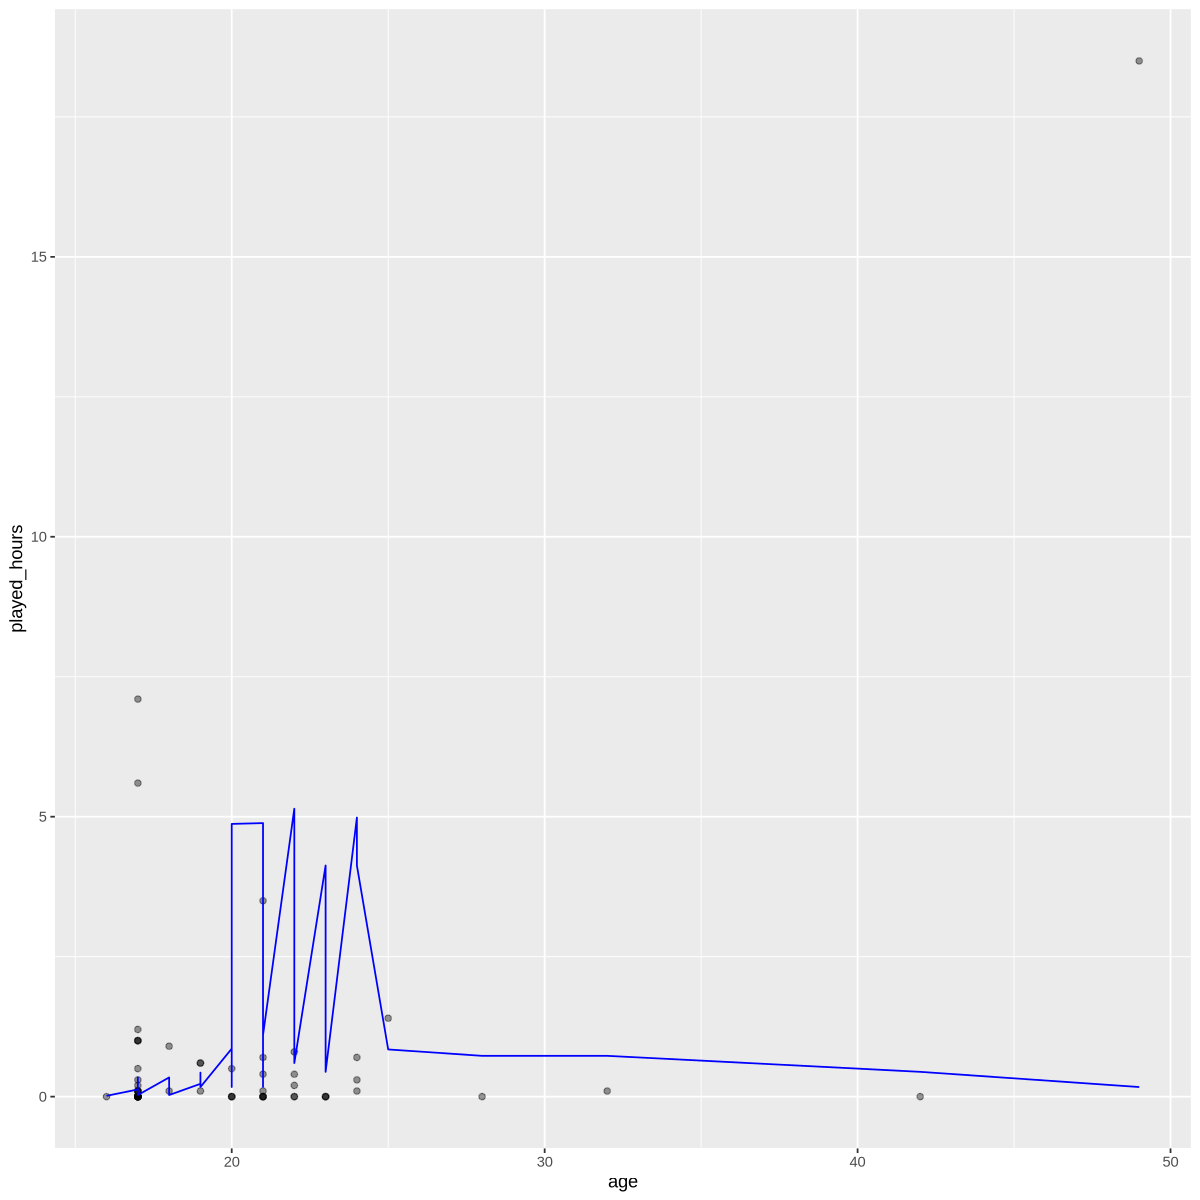

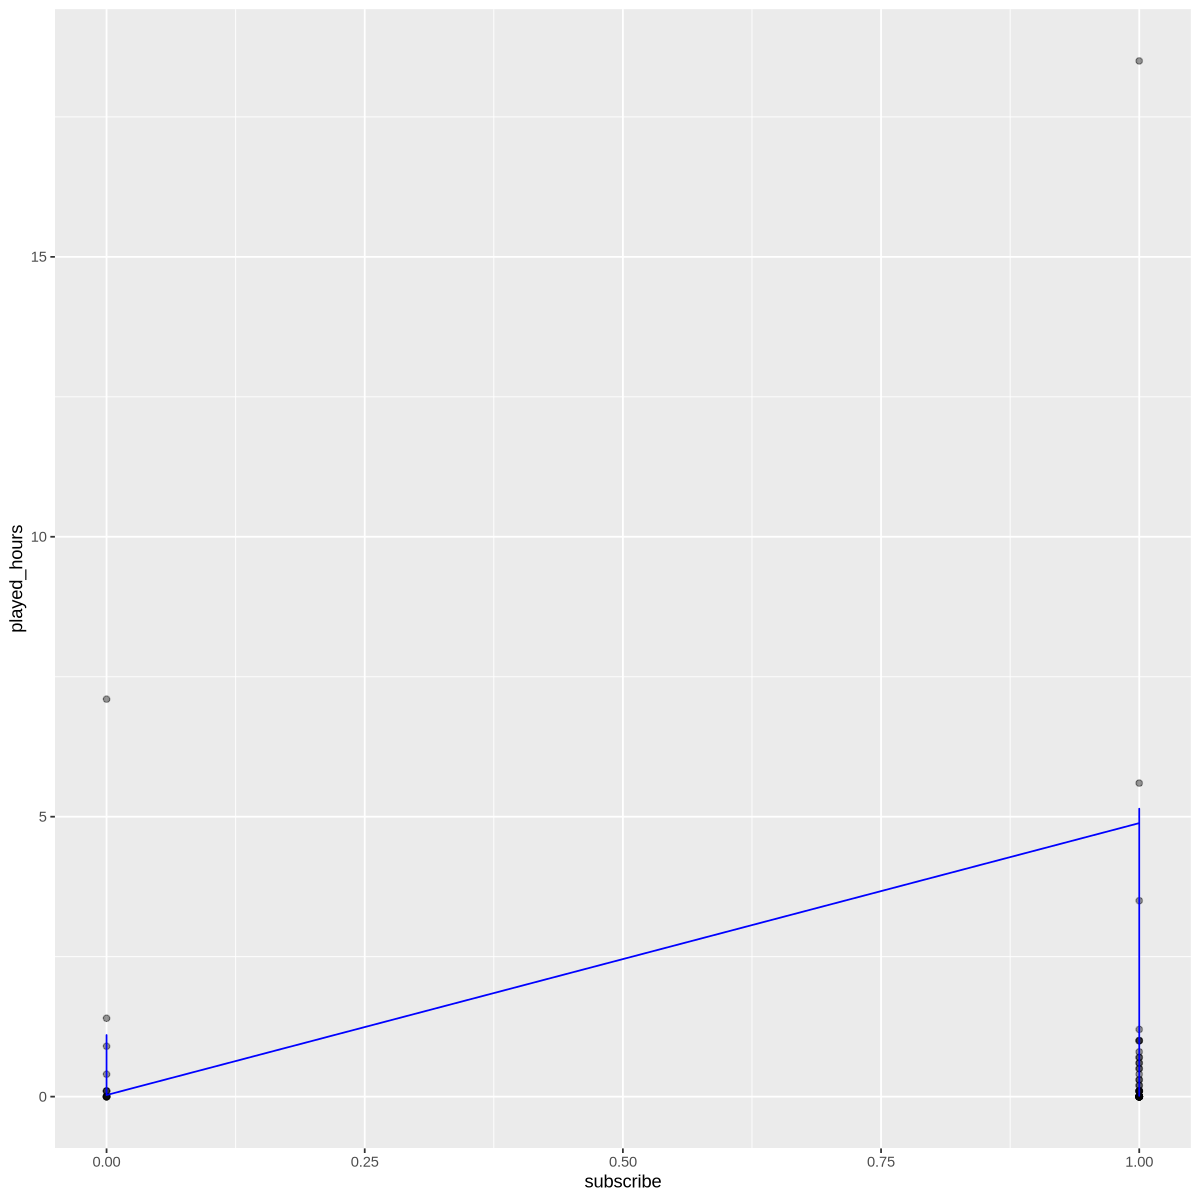

In [40]:
options(repr.plot.width = 10, repr.plot.height = 10)
plot_experience <- ggplot(test_pred, aes(x=experience, y=played_hours))+
geom_point(alpha=0.4)+
geom_line(aes(y=.pred), color="blue")
plot_experience

plot_age <- ggplot(test_pred, aes(x=age, y=played_hours))+
geom_point(alpha=0.4)+
geom_line(aes(y=.pred), color="blue")
plot_age

plot_subscribe <- ggplot(test_pred, aes(x=subscribe, y=played_hours))+
geom_point(alpha=0.4)+
geom_line(aes(y=.pred), color="blue")
plot_subscribe